# Elements of Modeling

### 11/1/22
### Hosted by and maintained by the [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu).  Authored by [Frank Wang](frankw084@berkeley.edu).

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline

import random
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from imageio import imread, imsave

## 1. What is Machine Learning?

The term *machine learning* was coined in 1959 by computer scientist Arthur Samuel after his work on creating a checker playing program. Samuel defined machine learning as:

> "a field of study that gives computers the ability to learn without being explicitly programmed"

Although this quote is likely misattributed, it still serves as a good baseline definition, despite being overly abstract and ambiguous. However, Samuel's work in 1959 is by no means the moment in time at which machine learning was "invented". The least squares method, one of the most common methods of data fitting in machine learning, was discovered over 150 years prior in 1805 by Adrien-Marie Legendre and in 1809 by Carl Friedrich Gauss.

Some of theory and methods behind machine learning have been around for decades, so why is it so popular now?
- Abundance of data (cloud storage)
- Abundance of computing power (advancements in GPUs)
- Money (companies have been able to make the above two profitable)

Machine Learning is an evolving field, it has been for nearly a century and will continue to evolve for the foreseeable future. Despite this, there are some commonalities in how machine learning is used today:

<img src='ml_steps.png' width=800, height=800>


As you can see, there is more to machine learning than just using some sophisticated learning algorithm, but that is without a doubt at the core of the machine learning process. The 7 steps above are a good summary, but remember that the machine learning process is **not** one-directional, it resembles more of a cycle. We will look into what that means later in this notebook.

## 2. Yeah, but what IS Machine Learning?

The background information and definitions above are still kind of ambiguous. Let's do a better job at concretely understanding the foundation of modern machine learning.

If you've taken Data 100, you have likely seen this image or an image like the one below. It's not perfect, for example you may eventually come across a semi-supervised learning problem, but it's a good start so take a few minutes to really understand everything in it.

<img src='ml_taxonomy.png' width=800, height=600>


**Supervised Learning** is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.

**Reinforcement learning** is an area of machine learning concerned with how intelligent agents ought to take actions in an environment in order to maximize the notion of cumulative reward.

**Unsupervised Learning** is a type of algorithm that learns patterns from untagged/unlabeled data. 



## 3. Classication vs Regression

Classification: SEPARATING DATA INTO CLASSES. Our dataset consists of data points which are labeled by which class they are in. Given new data points, we would like to predict which class they belong to. Examples include: classifying images as dogs vs cats, predicting whether or someone will default on their credit card payment. There are subcategories like binary classification, multi-class classification, and multi-label classification.

Regression: FITTING CURVES TO DATA. Our dataset consists of data points which are labeled with numerical values. Given new data points, we would like to predict their numerical values. Examples include: predicting how many points per game Steph Curry will average this season (a lot), predicting how many wins the Golden State Warriors will have this season (a lot).

<img src='classification_vs_regression.png' width=800, height=600>


## 4. Overfitting vs Underfitting

In statistics, **overfitting** is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit to additional data or predict future observations reliably". An **overfitted** model is a statistical model that contains more parameters than can be justified by the data. 

**Underfitting** occurs when a statistical model cannot adequately capture the underlying structure of the data. An **under-fitted** model is a model where some parameters or terms that would appear in a correctly specified model are missing.

<img src='overfitting.png' width=800, height=600>

But how can detect that our model is overfitting or underfitting? We need to use the idea of **Train-Valid-Test** split.

## 5. Training/Validation/Testing Set

Okay, let's break this down step by step: 
Suppose we have a dataset, why can't we just train a machine learning model on this dataset, and then start applying this model to new data that we see? Let's make some really important decisions with this model... that sounds like a really good idea, right?

Alright, so maybe we want to split into a "training" set and a "test" set. This way, we can train our model on the "training" set, and then test the performance of the model on the "test" set in order to have some idea of how our model might perform in the real world.

This all seems fine and dandy, so when does a "validation" set come into play? The possibilities are quite literally endless when it comes to picking from different machine learning models. How do we pick which one we actually use? If we train several different models on the "training" set, we can use each model's performance on the "validation" set to determine which model we would like to pick. Furthermore, for most machine learning models, there are hyperparameters which you should experiment with, and using a "validation" set can help you determine which hyperparameter values you want to use. (Much more on this later!)

You might be thinking: why can't we just see how each model does on the "test" set in order to pick a model? If you're thinking this, awesome! You're asking all the right questions. If you're not, that's also perfectly fine. Now, we will have a group discussion about why this is a bad idea.

<img src='train_val_test.png' width=800, height=600>

You only use **training set** to fit/train your model, i.e. adjusting the model parameters/weights by using the trainning set - `model.fit(X_train, y_train)`

You only use **validation set** to compare the performance of different models (or different hyperparameter choices).

You only use **test set** to evaluate the performance of your final model, so it can be used only *once*. 

## 6. From Linear Regression to Polynomial Regression (which, spoiler alert, is also Linear Regression)

In [2]:
# Load data
mpg = pd.read_csv("mpg.csv", index_col="name") 

# Remove rows that have missing horsepower
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) 

# Train, test split
mpg_train, mpg_test = train_test_split(mpg, 
                                       test_size = .2, 
                                       random_state = 0) 

# Notice that the splitting above creates a 60/20/20 split
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
datsun f-10 hatchback,33,4,85,70,1945,16,77,3
plymouth volare,20,6,225,100,3430,17,78,1
plymouth horizon,34,4,105,70,2200,13,79,1
ford maverick,24,6,200,81,3012,17,76,1
toyota corona hardtop,24,4,113,95,2278,15,72,3


We will try to use horsepower to predict mpg. Let's start by looking at a scatterplot of horsepower vs mpg.

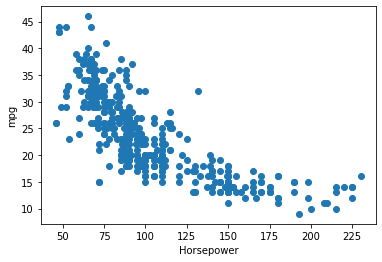

In [3]:
plt.scatter(mpg['horsepower'], mpg['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show();

In [4]:
# Obtain our data matrix X and response vector y

X_train = np.asmatrix(mpg_train[['horsepower']])
y_train = np.array(mpg_train['mpg'])

X_test = np.asmatrix(mpg_test[['horsepower']])
y_test = np.array(mpg_test['mpg'])

print(X_train.shape)
print(y_train.shape)

(313, 1)
(313,)


#### Let's fit a simple linear model to use horsepower to predict mpg.

In [5]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [6]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x)
    
    
    data.plot.scatter(x_name,y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(x,y)
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

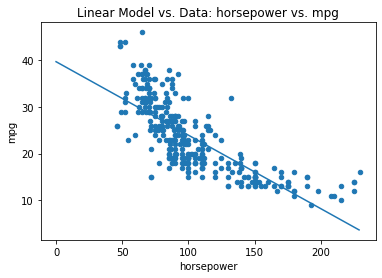

In [7]:
overlay_simple_linear_model(mpg_train, 'horsepower','mpg', linear_model)

#### As we saw during the last lesson, this simple linear model does not seem to model the relationship very well.
We probably want to try something else, so that we can get a better model, and we can also learn some valuable lessons. Let's try polynomial regression!

Polynomial regression is just linear regression performed on a polynomial feature set.

For example, if we're regressing on some column $X$, and we perform polynomial regression of degree 2, then our new feature matrix will include three columns:

 - $X^0$ (a column of 1's)
 - $X^1$ (our original $X$)
 - $X^2$ (squaring the value of each $X$)
 
You can think of this as fitting the best quadratic to the training data, instead of just the best line. If we perform polynomial regression of degree $k$, you can think of this as fitting the best degree $k$ polynomial to the training data.

In [8]:
# Don't worry too much about the code in this cell, just try to undertand the plots below
def polynomial_regression(degree, X, y):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    poly.fit(X_poly, y)
    
    linear_model = LinearRegression()
    linear_model = linear_model.fit(X_poly, y)
    
    x_range = np.arange(min(np.asarray(X.flatten())[0]), 
                  max(np.asarray(X.flatten())[0]) + .001, .001).reshape((-1, 1))

    predicted = linear_model.predict(poly.fit_transform(x_range))
    
    fig, ax = plt.subplots(figsize=(10, 8))

    plt.title("Polynomial Degree " + str(degree) + " Model: MPG vs Horsepower")
    plt.xlabel("Horsepower")
    plt.ylabel("MPG")
    plt.plot(x_range, predicted, color='red')
    plt.scatter(mpg.horsepower, mpg.mpg)
    return linear_model, poly
def polynomial_predict(linear_model, poly, X):
    return linear_model.predict(poly.fit_transform(X))
def compute_mse(pred, actual):
    return mean_squared_error(pred, actual, squared=True)

#### Example with a degree 2 polynomial:

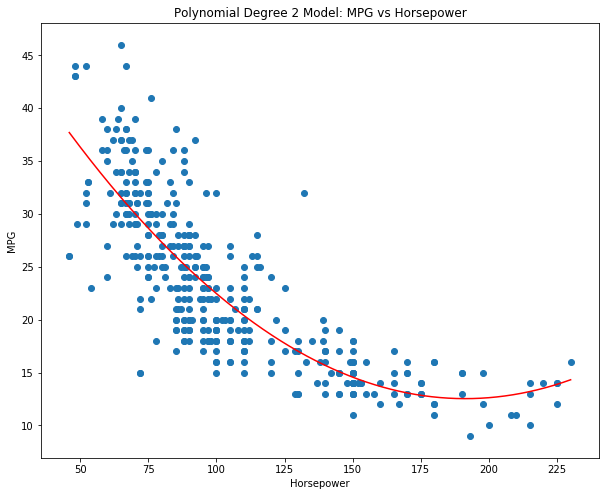

In [11]:
model_deg11, poly_deg11 = polynomial_regression(2, X_train, y_train)

In [12]:
print('Training MSE is: ' + str(compute_mse(polynomial_predict(model_deg11, poly_deg11, X_train), y_train)))

Training MSE is: 19.35926765958999


In [13]:
print('Testing MSE is: ' + str(compute_mse(polynomial_predict(model_deg11, poly_deg11, X_test), y_test)))

Testing MSE is: 14.955414365121062


#### Now, your job is to test a bunch of different degree values, and compare the performances of the different models on the validation data. Which model would you pick?: 

#### Hyperparameter Search Demonstration (to be live coded):

In [14]:
degrees = [2, 3, 4, 5, 6, 7, 8]

Degree: 2
Training MSE is: 19.35926765958999
Degree: 3
Training MSE is: 19.34240944127474
Degree: 4
Training MSE is: 19.26871431630809
Degree: 5
Training MSE is: 18.756203829244193
Degree: 6
Training MSE is: 18.60325580656365
Degree: 7
Training MSE is: 18.760402962529994
Degree: 8
Training MSE is: 18.91867626032996


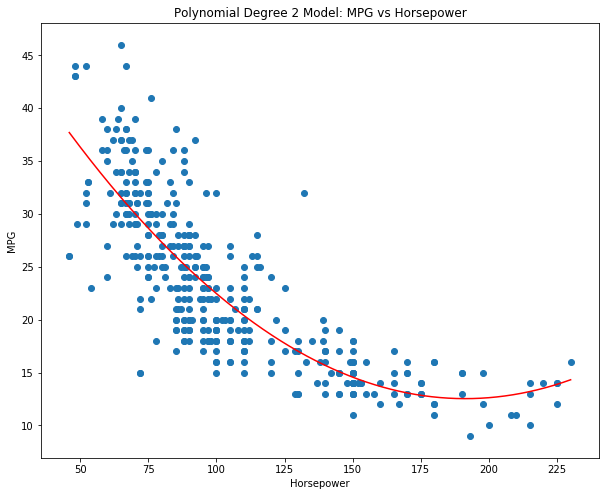

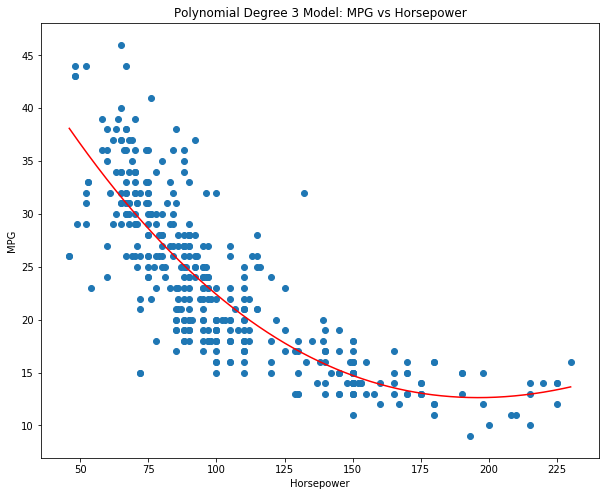

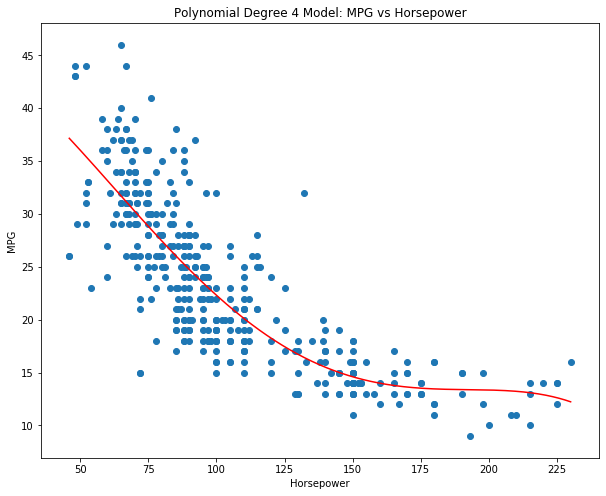

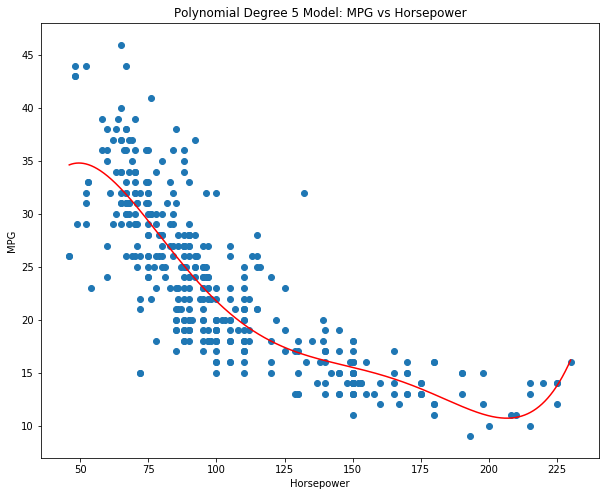

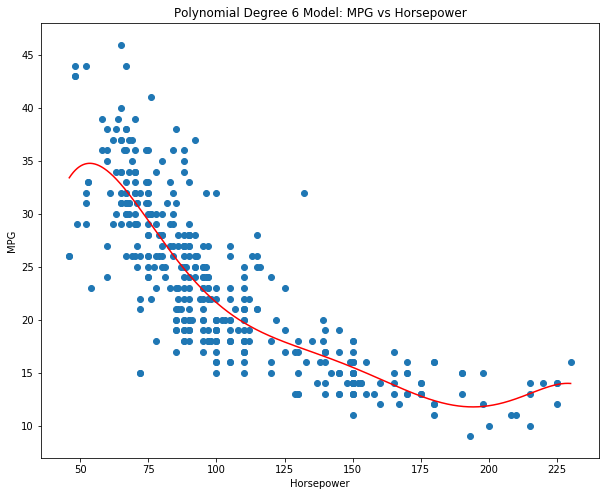

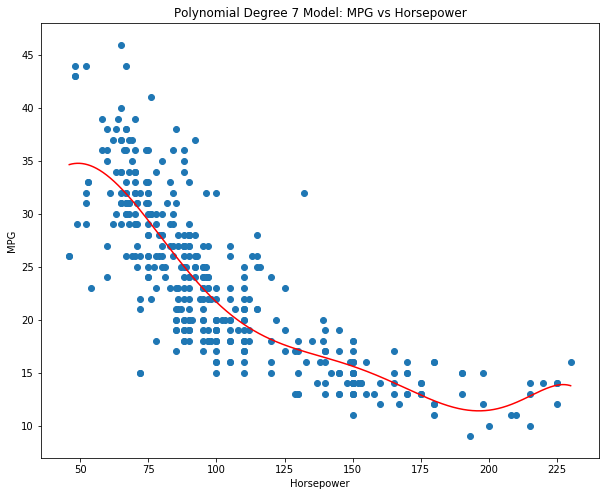

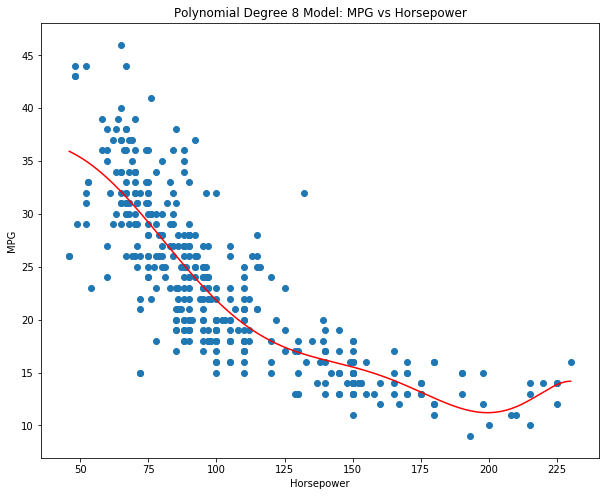

In [15]:
for degree in degrees:
    print('Degree: ' + str(degree))
    model, poly = polynomial_regression(degree, X_train, y_train)
    print('Training MSE is: ' + str(compute_mse(polynomial_predict(model, poly, X_train), y_train)))

#### Now that we've picked a model, we can check its performance on the test data.

Test MSE is: 14.11104519762835


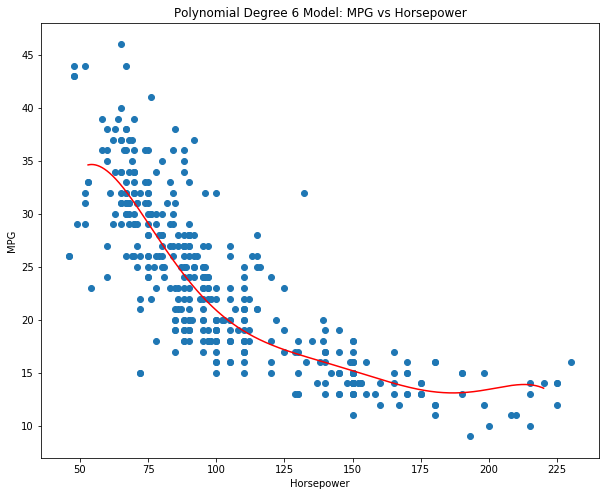

In [16]:
final_model, final_poly = polynomial_regression(6, X_test, y_test)
print('Test MSE is: ' + str(compute_mse(polynomial_predict(final_model, final_poly, X_test), y_test)))

## 6. Bias, Variance, Overfitting, Underfitting

In machine learning, the goal is to create a model that generalizes to new examples we haven't seen yet. In our training data, we may have some outliers due to random noise, or even bad data. It's often a delicate art to balance between fitting a model closely to the training data, but not so close to the point where it won't generalize as well to new data. Let's formalize this discussion by introducing bias, variance, overfitting, and underfitting.

### Bias
When evaluating a model, the most intuitive first step is to look at how well the model performs. For classification, this may be the percentage of data points correctly classified, or for regression it may be how close the predicted values are to actual. The bias of a model is a measure of how close our prediction is to the actual value on average from an average model.

Note that bias is not a measure of a single model, it encapsulates the scenario in which we collect many datasets, create models for each dataset, and average the error over all of models. Bias is not a measure of error for a single model, but a more abstract concept describing the average error over all errors. A low value for the bias of a model describes that on average, our predictions are similar to the actual values.

### Variance 
The variance of a model relates to the variance of the distribution of all models. In the previous section about bias, we envisoned the scenario of collecting many datasets, creating models for each dataset, and averaging the error overall the datasets. Instead, the variance of a model describes the variance in prediction. While we might be able to predict a value very well on average, if the variance of predictions is very high this may not be very helpful, as when we train a model we only have one such instance, and a high model variance tells us little about the true nature of the predictions. A low variance describes that our model will not predict very different values for different datasets.

<img src='bullseye.png' width=550, height=400>


### The Tradeoff (Overfitting/Underfitting)

At some point, as we make efforts to decrease our bias, instead of getting closer to the true model, we go past that and try to fit to the random noise and imperfections that are a part of any real-world dataset. This is equivalent to making our model more noisy, or overfit on our dataset, which means that over all datasets, it has more variance. This corresponds to the top right bullseye.

However, we can also be very unhappy in the opposite scenario. If we're too scared of high variance and don't make enough efforts to decrease our bias, we may have a situation like the bottom left bullseye: low variance but consistently off-target.

"Making efforts" to decrease our bias is a bit vague. Oftentimes, this is associated with increasing your model complexity. You can think of model complexity as how expressive your model can be. For example, with polynomial regression, a higher degree corresponds to higher model complexity. This means that the model has more ability to fit the training data more closely (but do we always want this?)  

<img src='model_complexity.png' width=550, height=400>


### We reached the end! Check your understanding by typing your answers in each question's cell: 

1. Name an example of a classification problem and an example of a regression problem that aren't already in this Notebook: 


2. What are each of the training, validation, and test dataset used for?

3. Describe the simple linear model (no polynomial regression) in terms of bias, variance, and overfitting/underfitting.

4. Describe the degree-11 polynomial regression model in terms of bias, variance, and overfitting/underfitting.